In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score

from scipy.stats import ks_2samp

import matplotlib.pyplot as plt

# Data Loading...

In [2]:
data=pd.read_csv('instagram_usage_lifestyle.csv')

## Data Inspection 

In [3]:
data.head(5)

,user_id,app_name,age,gender,country,urban_rural,income_level,employment_status,education_level,relationship_status,...,last_login_date,average_session_length_minutes,content_type_preference,preferred_content_theme,privacy_setting_level,two_factor_auth_enabled,biometric_login_used,linked_accounts_count,subscription_status,user_engagement_score
0,1,Instagram,51,Female,India,Rural,High,Retired,Bachelor’s,Single,...,2025-11-02,5.0,Mixed,Tech,Private,Yes,No,0,Free,7.83
1,2,Instagram,64,Female,United Kingdom,Urban,Middle,Full-time employed,Other,Divorced,...,2025-03-22,14.8,Photos,Fashion,Public,No,No,3,Free,1.43
2,3,Instagram,41,Female,Canada,Urban,Middle,Student,Bachelor’s,In a relationship,...,2025-08-10,5.0,Mixed,Other,Public,Yes,Yes,1,Free,9.67
3,4,Instagram,27,Non-binary,South Korea,Urban,Middle,Unemployed,Master’s,In a relationship,...,2025-03-31,25.9,Stories,Tech,Private,No,No,1,Free,0.94
4,5,Instagram,55,Male,India,Urban,Upper-middle,Full-time employed,Bachelor’s,Single,...,2025-03-19,13.1,Videos,Food,Public,Yes,No,0,Free,1.03


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547896 entries, 0 to 1547895
Data columns (total 58 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   user_id                         1547896 non-null  int64  
 1   app_name                        1547896 non-null  object 
 2   age                             1547896 non-null  int64  
 3   gender                          1547896 non-null  object 
 4   country                         1547896 non-null  object 
 5   urban_rural                     1547896 non-null  object 
 6   income_level                    1547896 non-null  object 
 7   employment_status               1547896 non-null  object 
 8   education_level                 1547896 non-null  object 
 9   relationship_status             1547896 non-null  object 
 10  has_children                    1547896 non-null  object 
 11  exercise_hours_per_week         1547896 non-null  float64
 12  

In [5]:
data.shape

(1547896, 58)

In [6]:
data.dtypes

user_id                             int64
app_name                           object
age                                 int64
gender                             object
country                            object
urban_rural                        object
income_level                       object
employment_status                  object
education_level                    object
relationship_status                object
has_children                       object
exercise_hours_per_week           float64
sleep_hours_per_night             float64
diet_quality                       object
smoking                            object
alcohol_frequency                  object
perceived_stress_score              int64
self_reported_happiness             int64
body_mass_index                   float64
blood_pressure_systolic             int64
blood_pressure_diastolic            int64
daily_steps_count                   int64
weekly_work_hours                 float64
hobbies_count                     

In [7]:
data.sample()

,user_id,app_name,age,gender,country,urban_rural,income_level,employment_status,education_level,relationship_status,...,last_login_date,average_session_length_minutes,content_type_preference,preferred_content_theme,privacy_setting_level,two_factor_auth_enabled,biometric_login_used,linked_accounts_count,subscription_status,user_engagement_score
708088,708089,Instagram,19,Female,Brazil,Urban,Lower-middle,Full-time employed,Some college,Single,...,2025-05-01,35.0,Videos,Food,Private,Yes,Yes,3,Premium,2.22


## Missing and duplicate data check

In [8]:
data.isnull().sum().sum()

0

In [9]:
data.duplicated().sum().sum()

0

## Cradinality or unique value check

In [10]:
data.nunique()

user_id                           1547896
app_name                                1
age                                    53
gender                                  4
country                                10
urban_rural                             3
income_level                            5
employment_status                       6
education_level                         6
relationship_status                     5
has_children                            2
exercise_hours_per_week               241
sleep_hours_per_night                  71
diet_quality                            5
smoking                                 3
alcohol_frequency                       5
perceived_stress_score                 41
self_reported_happiness                10
body_mass_index                       286
blood_pressure_systolic                70
blood_pressure_diastolic               40
daily_steps_count                     773
weekly_work_hours                     800
hobbies_count                     

## Statistical Summary

In [11]:
# Numeric columns
numeric_df = data.select_dtypes(include=['number'])

# Object (string) columns
object_df = data.select_dtypes(include=['object'])

In [12]:
numeric_df.describe()

,user_id,age,exercise_hours_per_week,sleep_hours_per_night,perceived_stress_score,self_reported_happiness,body_mass_index,blood_pressure_systolic,blood_pressure_diastolic,daily_steps_count,...,time_on_explore_per_day,time_on_messages_per_day,time_on_reels_per_day,followers_count,following_count,notification_response_rate,account_creation_year,average_session_length_minutes,linked_accounts_count,user_engagement_score
count,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,...,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06
mean,7.739485e+05,3.898544e+01,7.143480e+00,6.999384e+00,1.998774e+01,5.499804e+00,2.500084e+01,1.244917e+02,7.950007e+01,8.000105e+03,...,3.762037e+01,3.295203e+01,5.647662e+01,2.160543e+03,2.604942e+03,5.002404e-01,2.017501e+03,2.050971e+01,1.975254e+00,1.644642e+00
std,4.468392e+05,1.529453e+01,3.994556e+00,1.097098e+00,1.183258e+01,2.871232e+00,3.976188e+00,2.020699e+01,1.154874e+01,8.939761e+01,...,2.535788e+01,2.144569e+01,3.534782e+01,3.402016e+03,2.751922e+03,2.887827e-01,4.611735e+00,8.697454e+00,1.352058e+00,1.812684e+00
min,1.000000e+00,1.300000e+01,0.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.500000e+01,9.000000e+01,6.000000e+01,7.566000e+03,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,2.000000e+01,0.000000e+00,2.010000e+03,5.000000e+00,0.000000e+00,6.700000e-01
25%,3.869748e+05,2.600000e+01,4.000000e+00,6.300000e+00,1.000000e+01,3.000000e+00,2.230000e+01,1.070000e+02,7.000000e+01,7.940000e+03,...,1.800000e+01,1.600000e+01,2.900000e+01,5.430000e+02,6.630000e+02,2.500000e-01,2.013000e+03,1.330000e+01,1.000000e+00,1.000000e+00
50%,7.739485e+05,3.900000e+01,6.600000e+00,7.000000e+00,2.000000e+01,5.000000e+00,2.500000e+01,1.240000e+02,7.900000e+01,8.000000e+03,...,3.400000e+01,3.100000e+01,5.400000e+01,1.154000e+03,1.519000e+03,5.000000e-01,2.017000e+03,2.040000e+01,2.000000e+00,1.100000e+00
75%,1.160922e+06,5.200000e+01,9.700000e+00,7.700000e+00,3.000000e+01,8.000000e+00,2.770000e+01,1.420000e+02,9.000000e+01,8.060000e+03,...,5.300000e+01,4.700000e+01,8.000000e+01,2.459000e+03,3.451000e+03,7.500000e-01,2.022000e+03,2.760000e+01,3.000000e+00,1.290000e+00
max,1.547896e+06,6.500000e+01,2.410000e+01,1.000000e+01,4.000000e+01,1.000000e+01,4.500000e+01,1.590000e+02,9.900000e+01,8.473000e+03,...,1.710000e+02,1.380000e+02,2.220000e+02,2.088110e+05,1.000000e+04,1.000000e+00,2.025000e+03,5.200000e+01,5.000000e+00,1.867000e+01


## Removing unwanted columns

In [13]:
numeric_df = numeric_df.drop(columns=['user_id', 'account_creation_year'], errors='ignore')

## Data Distribution

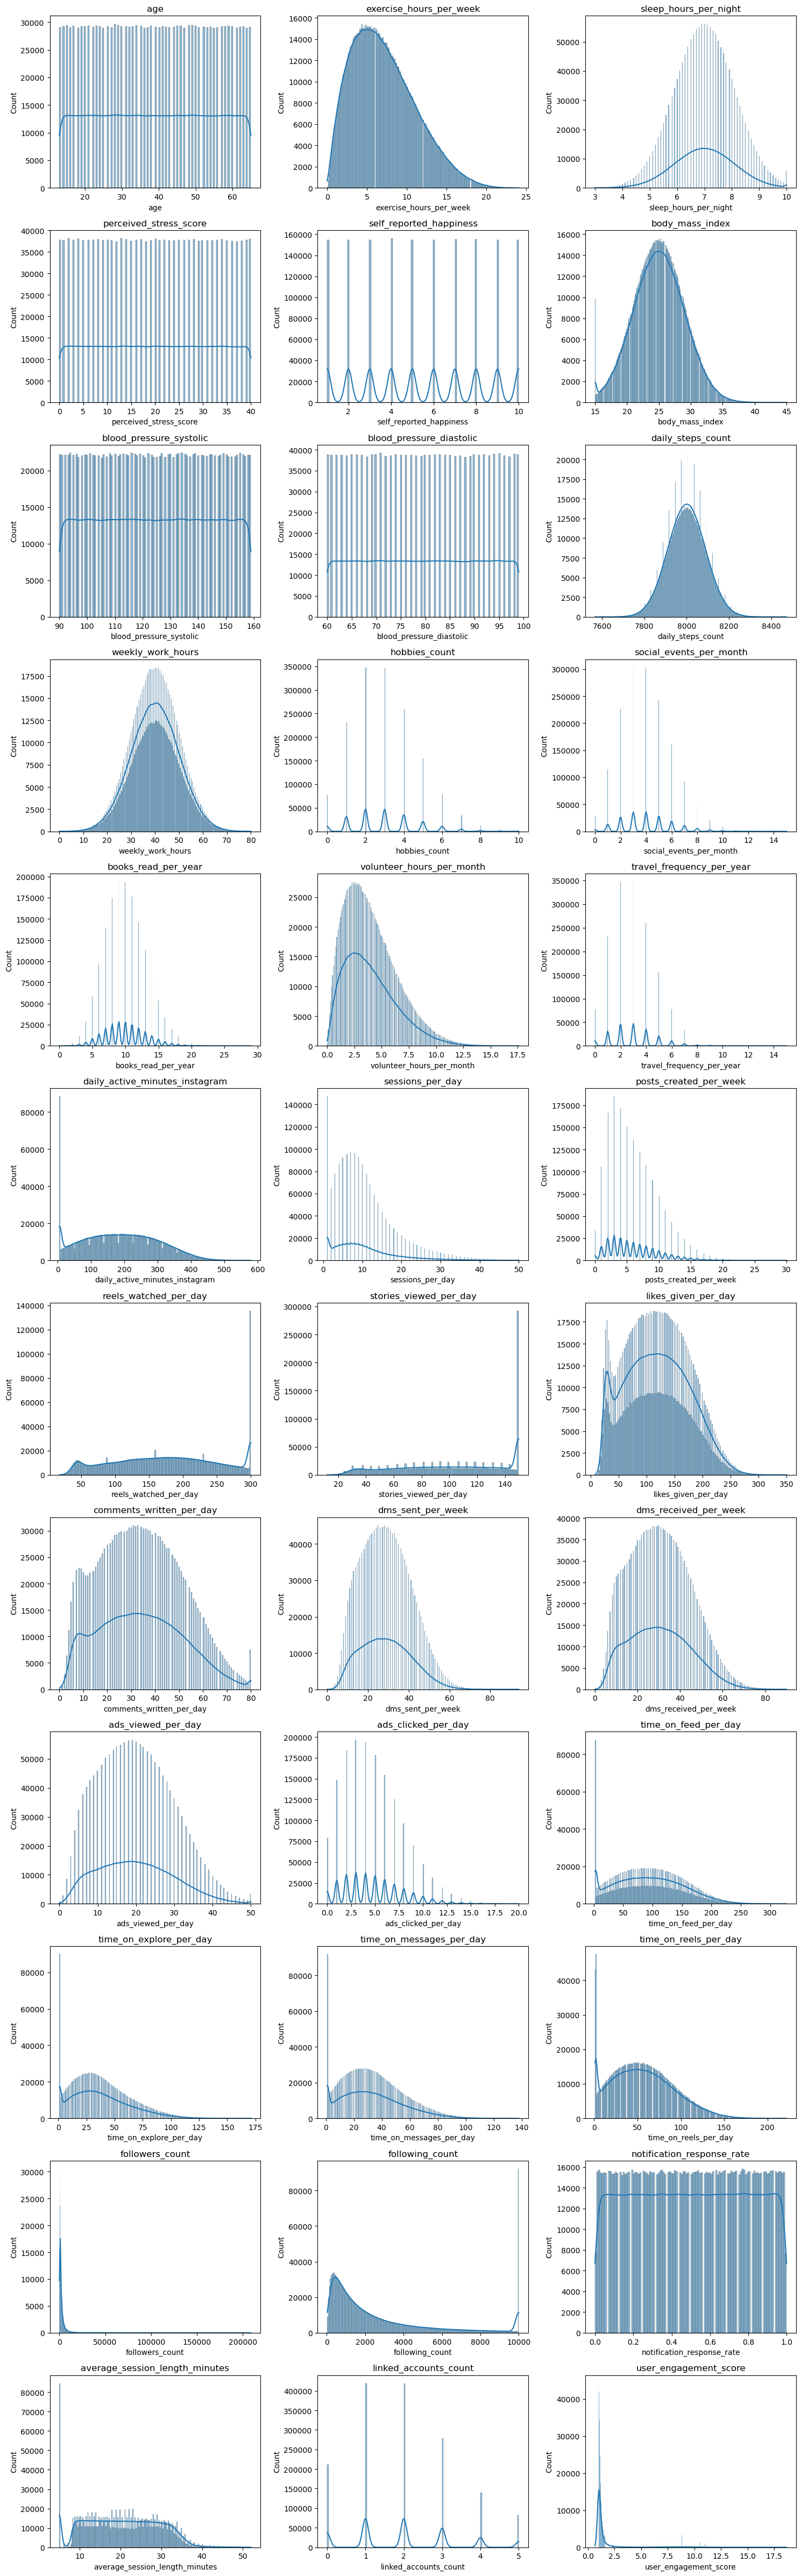

In [14]:
import math

cols = numeric_df.columns
n_cols = 3
n_rows = math.ceil(len(cols) / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(numeric_df[col].dropna(), kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

In [15]:
# Subsample Large Dataset

sample_frac = 0.1   # or fixed size / 1% of the data size
subsample = numeric_df.sample(frac=sample_frac, random_state=42)

# subsample = numeric_df.sample(n=100000, random_state=42) # If the dataset size is very high

print ("Number of points considered:", subsample.shape[0])

Number of points considered: 154790


In [16]:
# check the sample size

from scipy.stats import ks_2samp

ks_results = {}

for col in numeric_df.columns:
    stat, p_value = ks_2samp(
        numeric_df[col].dropna(),
        subsample[col].dropna()
    )
    
    ks_results[col] = {
        "ks_stat": stat,
        "p_value": p_value
    }

ks_df = pd.DataFrame(ks_results).T
ks_df["distribution_match"] = ks_df["p_value"] > 0.05

print(ks_df.sort_values("p_value"))



                                 ks_stat   p_value  distribution_match
notification_response_rate      0.004063  0.019169               False
following_count                 0.003659  0.046129               False
body_mass_index                 0.003329  0.088197                True
sleep_hours_per_night           0.003253  0.101517                True
age                             0.003214  0.108949                True
followers_count                 0.003157  0.120655                True
exercise_hours_per_week         0.003113  0.130568                True
daily_steps_count               0.002962  0.168976                True
reels_watched_per_day           0.002683  0.262752                True
time_on_feed_per_day            0.002433  0.374662                True
ads_viewed_per_day              0.002247  0.475617                True
posts_created_per_week          0.002014  0.617343                True
hobbies_count                   0.001980  0.638495                True
averag

## Scale the data

In [17]:
# Fit Scaler (Fit on Subsample → Apply Everywhere)

scaler = StandardScaler()

# Fit ONLY once
scaler.fit(subsample)

# Transform subsample
X_sub = scaler.transform(subsample)

# Transform full data using SAME scaler
X_full = scaler.transform(numeric_df)


In [18]:
K_range = range(2, 15)

inertia_list = []
silhouette_list = []

SIL_SAMPLE_SIZE = 1000   # Your requirement

    

In [20]:
for k in K_range:
    
    print(f"Running KMeans for k = {k}")
    
    km = KMeans(
        n_clusters=k,
        random_state=42,
        n_init='auto'
    )
    
    labels = km.fit_predict(X_sub)

    # Elbow → Use full subsample
    inertia_list.append(km.inertia_)

    # Silhouette → Use sample of 1000
    sil_score = silhouette_score(
        X_sub,
        labels,
        sample_size=SIL_SAMPLE_SIZE,
        random_state=42
    )
    
    silhouette_list.append(sil_score)

    print(f"k={k} → Inertia={km.inertia_:.2f}, Silhouette={sil_score:.4f}")


Running KMeans for k = 2


D:\Software\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\Software\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "D:\Software\anaconda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Software\anaconda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "D:\Software\anaconda\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, arg

k=2 → Inertia=4142897.31, Silhouette=0.2133
Running KMeans for k = 3
k=3 → Inertia=3829705.54, Silhouette=0.1114
Running KMeans for k = 4
k=4 → Inertia=3649817.03, Silhouette=0.1007
Running KMeans for k = 5
k=5 → Inertia=3545065.36, Silhouette=0.0692
Running KMeans for k = 6
k=6 → Inertia=3456358.94, Silhouette=0.0698
Running KMeans for k = 7
k=7 → Inertia=3414093.75, Silhouette=0.0547
Running KMeans for k = 8
k=8 → Inertia=3362176.97, Silhouette=0.0648
Running KMeans for k = 9
k=9 → Inertia=3323341.37, Silhouette=0.0552
Running KMeans for k = 10
k=10 → Inertia=3283581.49, Silhouette=0.0544
Running KMeans for k = 11
k=11 → Inertia=3259254.45, Silhouette=0.0517
Running KMeans for k = 12
k=12 → Inertia=3225962.14, Silhouette=0.0502
Running KMeans for k = 13
k=13 → Inertia=3197152.71, Silhouette=0.0509
Running KMeans for k = 14
k=14 → Inertia=3182526.14, Silhouette=0.0464


## Plot Elbow

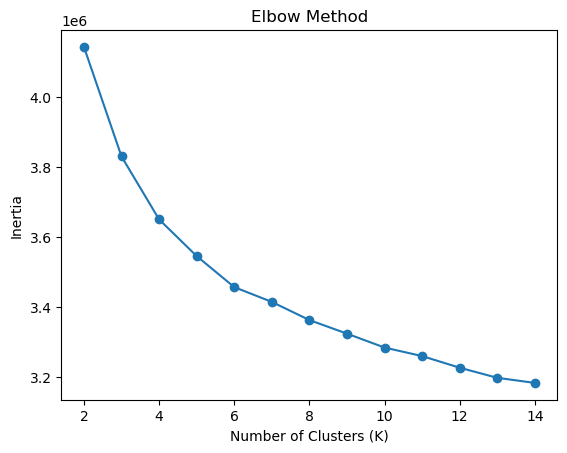

In [21]:
plt.figure()
plt.plot(K_range, inertia_list, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


## Plot Silhouette

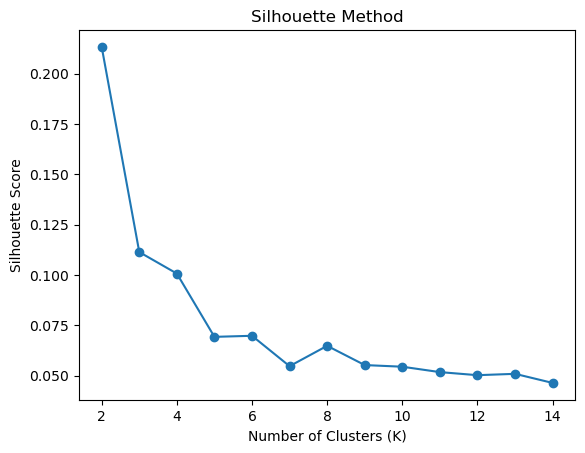

In [22]:
plt.figure()
plt.plot(K_range, silhouette_list, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.show()


##  Other way using CV 

In [23]:
def kmeans_cv_validation(
    df,
    scaler,
    K_range,
    n_runs=5,
    sample_frac=0.1,
    sil_sample_size=1000
):
    
    results = {}

    for k in K_range:
        
        sil_scores = []

        print(f"\nChecking stability for K = {k}")

        for run in range(n_runs):

            # Step 1 — New subsample each run
            sample = df.sample(frac=sample_frac, random_state=42 + run)

            # Step 2 — Scale using SAME scaler
            X = scaler.transform(sample)

            # Step 3 — Fit KMeans
            km = KMeans(
                n_clusters=k,
                random_state=42 + run,
                n_init='auto'
            )

            labels = km.fit_predict(X)

            # Step 4 — Silhouette (sampled for speed)
            sil = silhouette_score(
                X,
                labels,
                sample_size=min(sil_sample_size, len(X)),
                random_state=42
            )

            sil_scores.append(sil)

            print(f"Run {run+1} → Silhouette = {sil:.4f}")

        results[k] = {
            "mean_silhouette": np.mean(sil_scores),
            "std_silhouette": np.std(sil_scores)
        }

    return pd.DataFrame(results).T


In [24]:
cv_results = kmeans_cv_validation(
    numeric_df,
    scaler,
    K_range=range(2, 15),
    n_runs=5,
    sample_frac=0.1,
    sil_sample_size=1000
)

print(cv_results.sort_values("mean_silhouette", ascending=False))



Checking stability for K = 2
Run 1 → Silhouette = 0.2133
Run 2 → Silhouette = 0.2182
Run 3 → Silhouette = 0.2058
Run 4 → Silhouette = 0.2158
Run 5 → Silhouette = 0.2064

Checking stability for K = 3
Run 1 → Silhouette = 0.1114
Run 2 → Silhouette = 0.1178
Run 3 → Silhouette = 0.1183
Run 4 → Silhouette = 0.1162
Run 5 → Silhouette = 0.1136

Checking stability for K = 4
Run 1 → Silhouette = 0.1007
Run 2 → Silhouette = 0.0981
Run 3 → Silhouette = 0.0953
Run 4 → Silhouette = 0.0991
Run 5 → Silhouette = 0.0947

Checking stability for K = 5
Run 1 → Silhouette = 0.0692
Run 2 → Silhouette = 0.0699
Run 3 → Silhouette = 0.0714
Run 4 → Silhouette = 0.0986
Run 5 → Silhouette = 0.0709

Checking stability for K = 6
Run 1 → Silhouette = 0.0698
Run 2 → Silhouette = 0.0701
Run 3 → Silhouette = 0.0720
Run 4 → Silhouette = 0.0722
Run 5 → Silhouette = 0.0706

Checking stability for K = 7
Run 1 → Silhouette = 0.0547
Run 2 → Silhouette = 0.0660
Run 3 → Silhouette = 0.0561
Run 4 → Silhouette = 0.0722
Run 5 → 

## Apply K-Means with number of cluster as 2 to the data

In [26]:
kmeans = KMeans(n_clusters=2, random_state=42)
data["cluster"] = kmeans.fit_predict(X_full)

## Lets check profiling of the Instagram users!!

In [28]:
data["cluster"].value_counts()

cluster
1    789001
0    758895
Name: count, dtype: int64

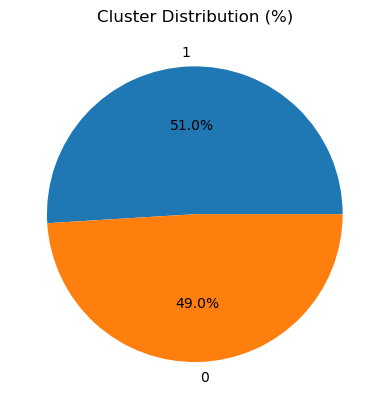

In [29]:
import matplotlib.pyplot as plt

cluster_counts = data["cluster"].value_counts()

plt.figure()
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%')
plt.title("Cluster Distribution (%)")
plt.show()


## Lets Dig more into Clusters!

In [31]:
cluster0 = data[data["cluster"] == 0]
cluster1 = data[data["cluster"] == 1]


In [32]:
# Select only numeric columns
numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns

# Remove unwanted numeric columns
numeric_cols = numeric_cols.drop(["user_id", "cluster"], errors="ignore")


In [34]:
#Sample Each Cluster
cluster0_sample = cluster0[numeric_cols].sample(n=2000, random_state=42)
cluster1_sample = cluster1[numeric_cols].sample(n=2000, random_state=42)


In [35]:
#Scale Data
scaler = StandardScaler()

X0 = scaler.fit_transform(cluster0_sample)
X1 = scaler.fit_transform(cluster1_sample)

## Cluster 0 Dendrogram

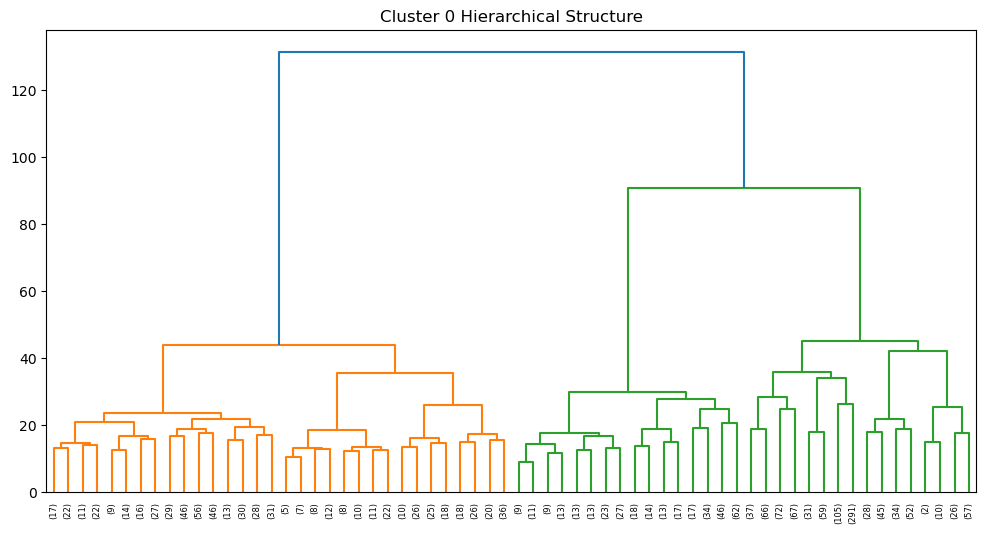

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z0 = linkage(X0, method="ward")

plt.figure(figsize=(12,6))
dendrogram(Z0, truncate_mode="level", p=5)
plt.title("Cluster 0 Hierarchical Structure")
plt.show()


## Cluster 1 Dendrogram

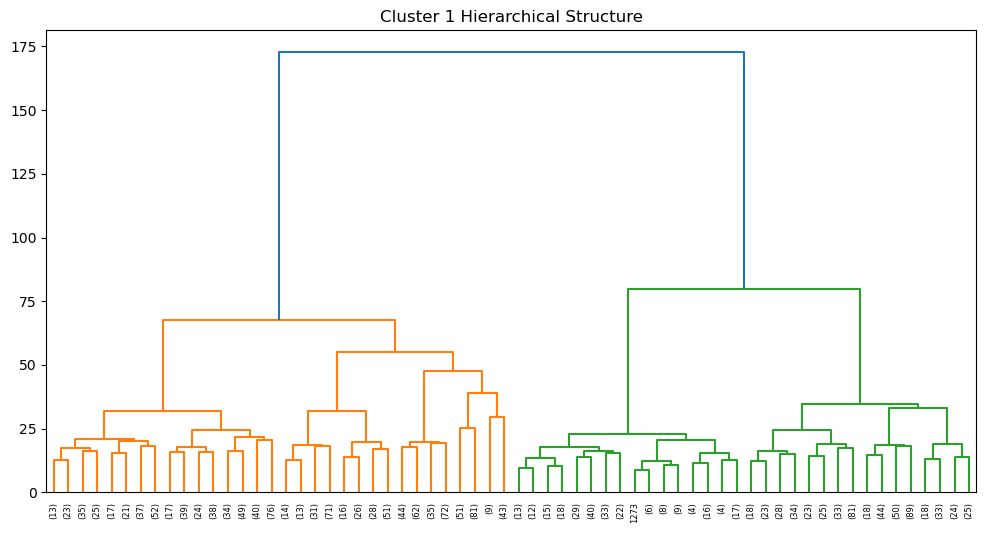

In [37]:
Z1 = linkage(X1, method="ward")

plt.figure(figsize=(12,6))
dendrogram(Z1, truncate_mode="level", p=5)
plt.title("Cluster 1 Hierarchical Structure")
plt.show()


In [38]:
from sklearn.cluster import AgglomerativeClustering

#Cluster 0 Subclusters
agg0 = AgglomerativeClustering(n_clusters=2, linkage="ward")

cluster0_sample["sub_cluster"] = agg0.fit_predict(X0)


In [39]:
##Cluster 1 Subclusters
agg1 = AgglomerativeClustering(n_clusters=2, linkage="ward")

cluster1_sample["sub_cluster"] = agg1.fit_predict(X1)


In [45]:
from sklearn.ensemble import RandomForestClassifier

# ---------- CLUSTER 1 ----------

# Train model using sample subclusters
sub_model_1 = RandomForestClassifier(random_state=42)
sub_model_1.fit(X1, cluster1_sample["sub_cluster"])

# Get full cluster 1 data
cluster1_full = data[data["cluster"] == 1].copy()

# Scale full data (use SAME scaler + SAME numeric columns)
X1_full = scaler.transform(cluster1_full[numeric_cols])

# Predict subclusters
cluster1_full["sub_cluster"] = sub_model_1.predict(X1_full)

# Write back to main dataframe
data.loc[cluster1_full.index, "sub_cluster"] = cluster1_full["sub_cluster"]


# ---------- CLUSTER 0 ----------

# Train model using sample subclusters
sub_model_0 = RandomForestClassifier(random_state=42)
sub_model_0.fit(X0, cluster0_sample["sub_cluster"])

# Get full cluster 0 data
cluster0_full = data[data["cluster"] == 0].copy()

# Scale full data
X0_full = scaler.transform(cluster0_full[numeric_cols])

# Predict subclusters
cluster0_full["sub_cluster"] = sub_model_0.predict(X0_full)

# Write back to main dataframe
data.loc[cluster0_full.index, "sub_cluster"] = cluster0_full["sub_cluster"]


# ---------- FINAL CHECK ----------

print(data[["cluster", "sub_cluster"]].head())

print("\nCluster + Subcluster Distribution:")
print(data.groupby(["cluster", "sub_cluster"]).size())



   cluster  sub_cluster
0        1          0.0
1        1          0.0
2        1          0.0
3        0          0.0
4        0          0.0

Cluster + Subcluster Distribution:
cluster  sub_cluster
0        0.0            758895
1        0.0            310326
         1.0            478675
dtype: int64


In [46]:
data

,user_id,app_name,age,gender,country,urban_rural,income_level,employment_status,education_level,relationship_status,...,content_type_preference,preferred_content_theme,privacy_setting_level,two_factor_auth_enabled,biometric_login_used,linked_accounts_count,subscription_status,user_engagement_score,cluster,sub_cluster
0,1,Instagram,51,Female,India,Rural,High,Retired,Bachelor’s,Single,...,Mixed,Tech,Private,Yes,No,0,Free,7.83,1,0.0
1,2,Instagram,64,Female,United Kingdom,Urban,Middle,Full-time employed,Other,Divorced,...,Photos,Fashion,Public,No,No,3,Free,1.43,1,0.0
2,3,Instagram,41,Female,Canada,Urban,Middle,Student,Bachelor’s,In a relationship,...,Mixed,Other,Public,Yes,Yes,1,Free,9.67,1,0.0
3,4,Instagram,27,Non-binary,South Korea,Urban,Middle,Unemployed,Master’s,In a relationship,...,Stories,Tech,Private,No,No,1,Free,0.94,0,0.0
4,5,Instagram,55,Male,India,Urban,Upper-middle,Full-time employed,Bachelor’s,Single,...,Videos,Food,Public,Yes,No,0,Free,1.03,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547891,1547892,Instagram,61,Female,United States,Suburban,High,Full-time employed,Master’s,Widowed,...,Videos,Other,Friends only,Yes,Yes,4,Free,0.97,0,0.0
1547892,1547893,Instagram,42,Male,United States,Urban,Lower-middle,Full-time employed,Master’s,Divorced,...,Photos,Art,Private,No,No,1,Premium,1.32,1,0.0
1547893,1547894,Instagram,32,Male,Canada,Urban,Low,Full-time employed,Master’s,Single,...,Live,Other,Private,Yes,Yes,5,Free,1.01,1,1.0
1547894,1547895,Instagram,14,Female,Other,Urban,Low,Student,Bachelor’s,Single,...,Live,Tech,Private,Yes,No,3,Free,1.11,0,0.0


## Lets Break down the analysis!!

In [54]:
cluster1_data = data[data["cluster"] == 1]

country_subcluster = (
    cluster1_data
    .groupby(["country", "sub_cluster"])
    .size()
    .reset_index(name="user_count")
)

print(country_subcluster)



           country  sub_cluster  user_count
0        Australia          0.0       18364
1        Australia          1.0       28586
2           Brazil          0.0       37198
3           Brazil          1.0       57813
4           Canada          0.0       21937
5           Canada          1.0       33477
6          Germany          0.0       15455
7          Germany          1.0       24076
8            India          0.0       55671
9            India          1.0       85675
10           Japan          0.0       12457
11           Japan          1.0       19116
12           Other          0.0       30907
13           Other          1.0       48035
14     South Korea          0.0       15769
15     South Korea          1.0       23995
16  United Kingdom          0.0       24751
17  United Kingdom          1.0       38084
18   United States          0.0       77817
19   United States          1.0      119818


In [55]:
cluster0_data = data[data["cluster"] == 0]

country_subcluster = (
    cluster0_data
    .groupby(["country", "sub_cluster"])
    .size()
    .reset_index(name="user_count")
)

print(country_subcluster)


          country  sub_cluster  user_count
0       Australia          0.0       45572
1          Brazil          0.0       91247
2          Canada          0.0       53170
3         Germany          0.0       37798
4           India          0.0      136996
5           Japan          0.0       30426
6           Other          0.0       75630
7     South Korea          0.0       38286
8  United Kingdom          0.0       60576
9   United States          0.0      189194


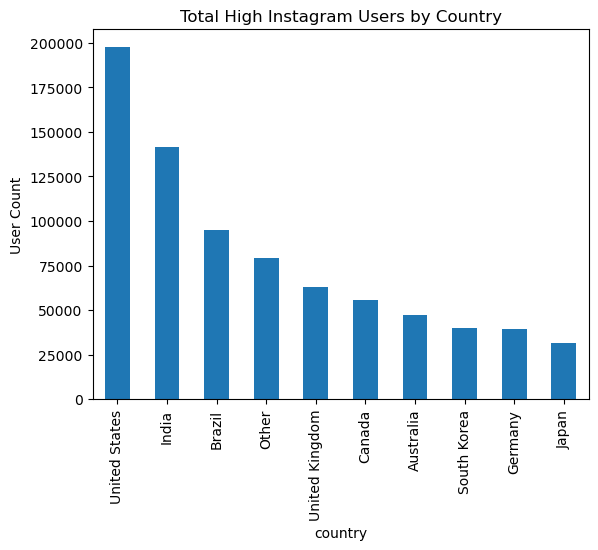

In [52]:
cluster1_country_total = cluster1_data["country"].value_counts()

plt.figure()
cluster1_country_total.plot(kind="bar")
plt.title("Total High Instagram Users by Country")
plt.ylabel("User Count")
plt.show()


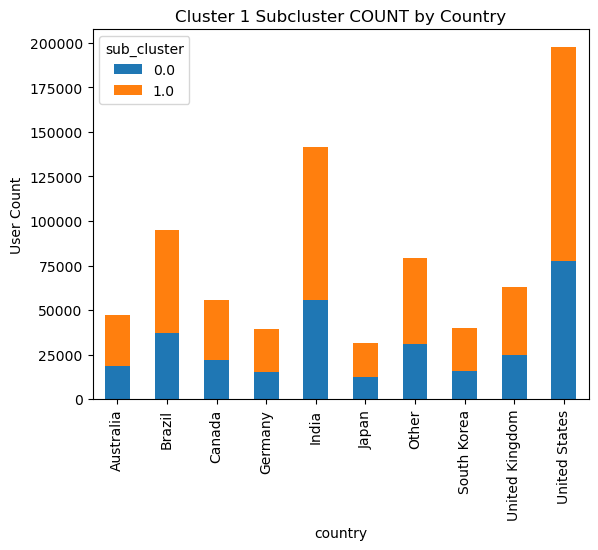

In [53]:
country_pivot.plot(kind="bar", stacked=True)
plt.title("Cluster 1 Subcluster COUNT by Country")
plt.ylabel("User Count")
plt.show()


In [56]:
pd.crosstab(
    data["employment_status"],
    data["sub_cluster"],
    normalize="index"
) * 100


sub_cluster,0.0,1.0
employment_status,,
Freelancer,69.043632,30.956368
Full-time employed,69.099043,30.900957
Part-time,69.062237,30.937763
Retired,68.902047,31.097953
Student,69.111277,30.888723
Unemployed,68.995299,31.004701


In [57]:
pd.crosstab(
    data["employment_status"],
    data["cluster"],
    normalize="index"
) * 100


cluster,0,1
employment_status,,
Freelancer,49.023238,50.976762
Full-time employed,49.037725,50.962275
Part-time,49.177600,50.822400
Retired,48.695671,51.304329
Student,49.005836,50.994164
Unemployed,49.014463,50.985537


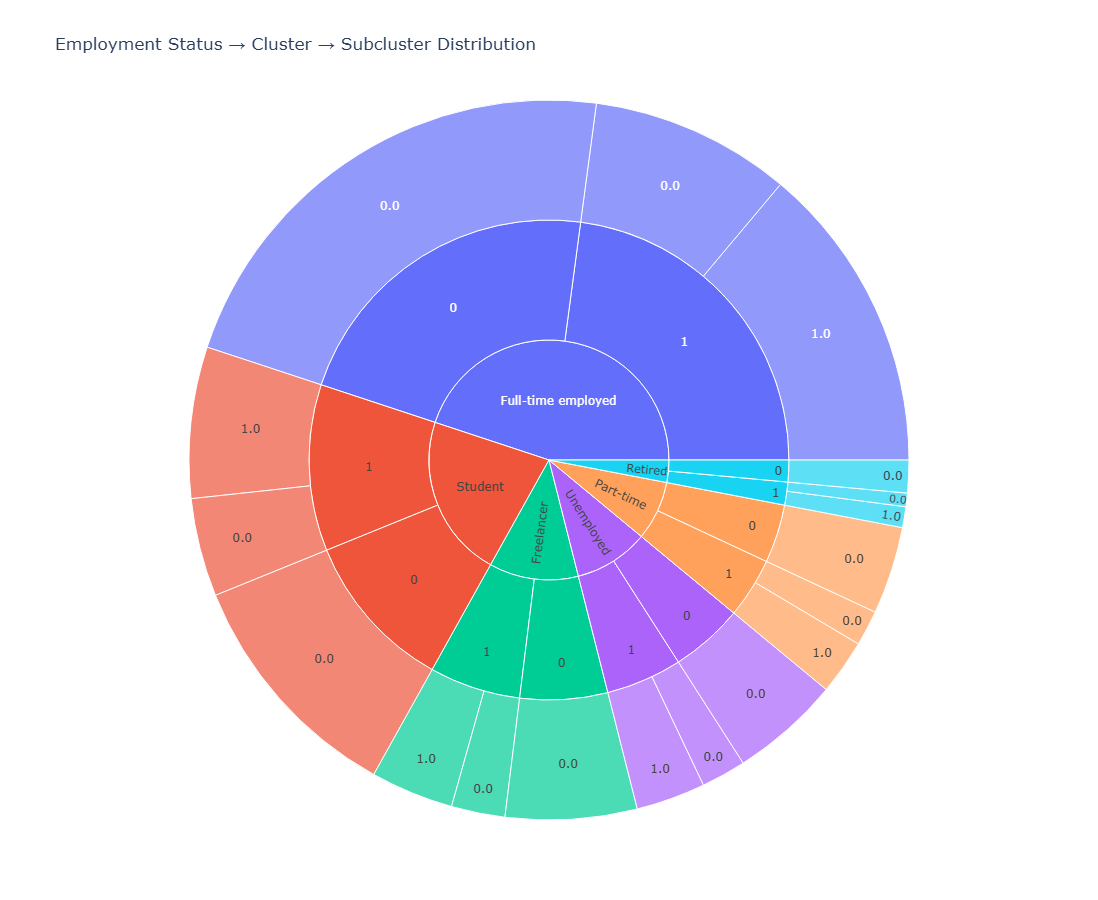

In [60]:
import plotly.express as px

sunburst_emp = (
    data
    .groupby(["employment_status", "cluster", "sub_cluster"])
    .size()
    .reset_index(name="count")
)

sunburst_emp["cluster"] = sunburst_emp["cluster"].astype(str)
sunburst_emp["sub_cluster"] = sunburst_emp["sub_cluster"].astype(str)

fig = px.sunburst(
    sunburst_emp,
    path=["employment_status", "cluster", "sub_cluster"],
    values="count",
    title="Employment Status → Cluster → Subcluster Distribution"
)

# ⭐ Increase figure size here
fig.update_layout(
    width=900,   # increase width
    height=900   # increase height
)

fig.show()


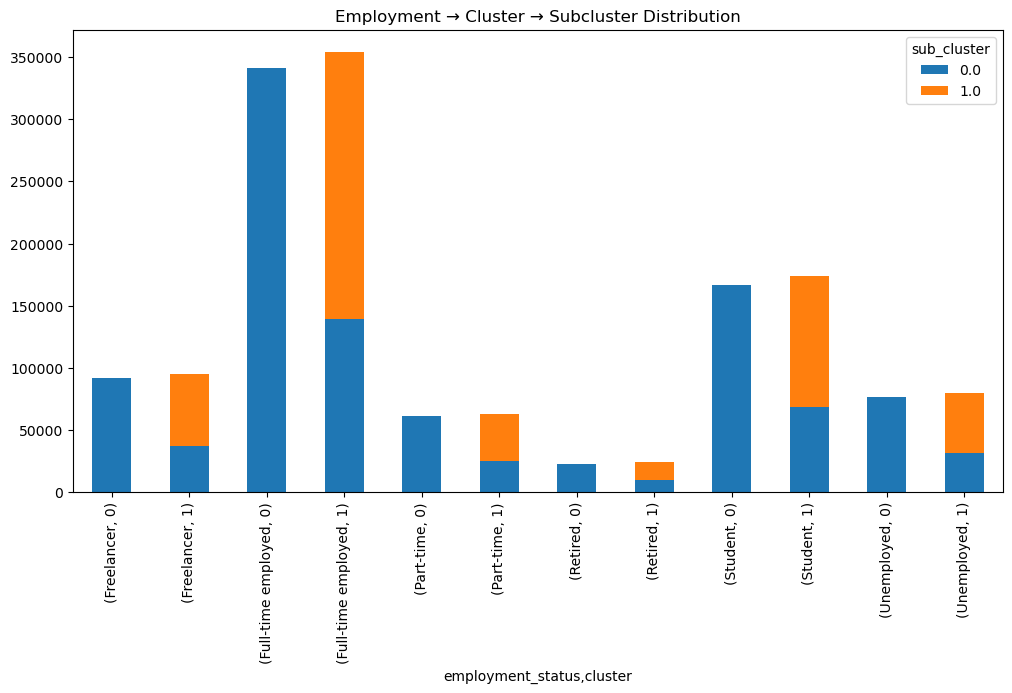

In [63]:
pd.crosstab(
    [data["employment_status"], data["cluster"]],
    data["sub_cluster"]
).plot(kind="bar", stacked=True, figsize=(12,6))

plt.title("Employment → Cluster → Subcluster Distribution")
plt.show()
